In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import ipywidgets as widgets
import logging
logging.basicConfig(level=logging.INFO)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lane_detector import CameraCalibration

cc = CameraCalibration(9, 6, '../data/camera_cal', store_output_images=True)

INFO:CameraUtils:Skipping output_params.json - Not an image file
INFO:CameraUtils:Skipping output - Not an image file
Finding chessboard corners: 100%|██████████| 20/20 [00:03<00:00,  7.20it/s]
INFO:CameraUtils:Successfully calculated Camera Matrix.Skipped processing 2 images


In [3]:
straight_lines = [cc.undistort_image(mpimg.imread(i)) for i in [
                        '../data/test_images/straight_lines1.jpg',
                        '../data/test_images/straight_lines2.jpg']]               

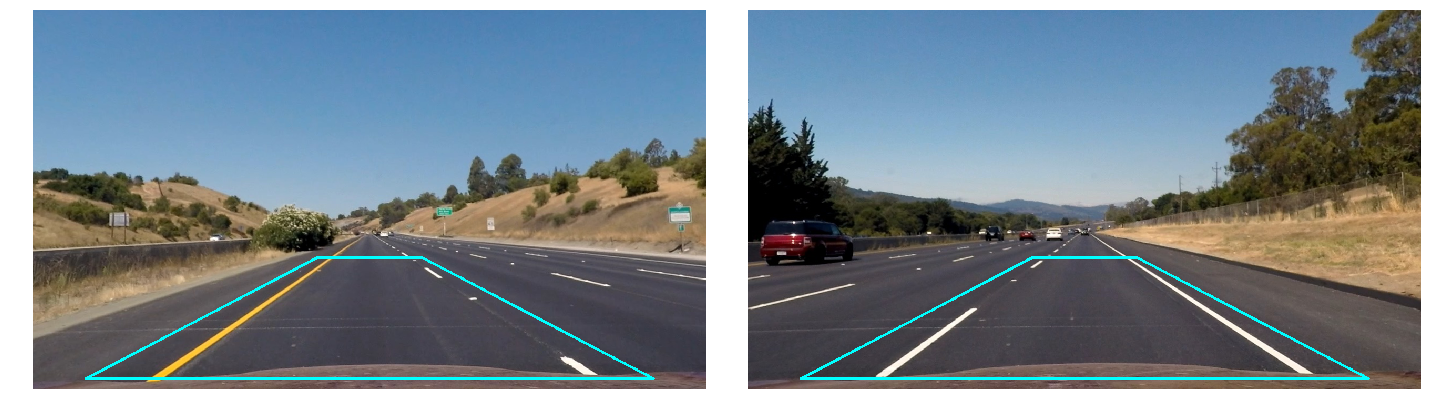

In [8]:
n_rows, n_cols = straight_lines[0].shape[0], straight_lines[0].shape[1]

offset_pix = 100
y_bottom = 700
y_horizon = 470

source_points = np.array([[ offset_pix, y_bottom,], # Bottom Left
                          [n_cols - offset_pix, y_bottom], # Bottom Right
                          [n_cols/2 + offset_pix, y_horizon], # Top right
                          [n_cols/2 - offset_pix, y_horizon] # Top Left
                         ], dtype=np.float32)

dst_n_rows, dst_n_cols = 450, 800
destination_points = np.array([[offset_pix , dst_n_rows ], # Bottom Left
                               [ dst_n_cols - offset_pix, dst_n_rows], # Bottom Right
                               [ dst_n_cols - offset_pix, 0], # Top Right
                               [offset_pix , 0], # Top Left
                              ], dtype=np.float32)

imgs_copy = [np.copy(i) for i in straight_lines]


f, axes = plt.subplots(1, len(imgs_copy), figsize=(20,10))
f.tight_layout()
for i in range(len(imgs_copy)):
    axes[i].axis('off')
    cv2.polylines(imgs_copy[i], [source_points.astype(np.int32)], True, (0,255,255), thickness=3)
    axes[i].imshow(imgs_copy[i])

M = cv2.getPerspectiveTransform(source_points, destination_points)
MInv = cv2.getPerspectiveTransform(destination_points, source_points)

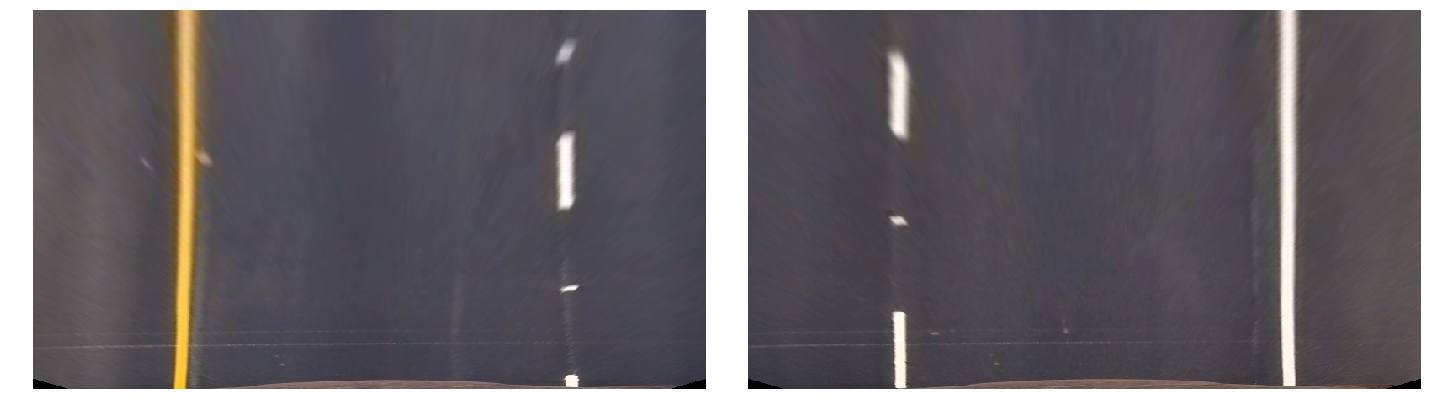

In [6]:
warped_1 = cv2.warpPerspective(straight_lines[0], M, (dst_n_cols, dst_n_rows), flags=cv2.INTER_LINEAR)
warped_2= cv2.warpPerspective(straight_lines[1], M, (dst_n_cols, dst_n_rows), flags=cv2.INTER_LINEAR)

f, axes = plt.subplots(1, len(imgs_copy), figsize=(20,10))
f.tight_layout()
axes[0].axis('off')
axes[1].axis('off')
axes[0].imshow(warped_1)
axes[1].imshow(warped_2)

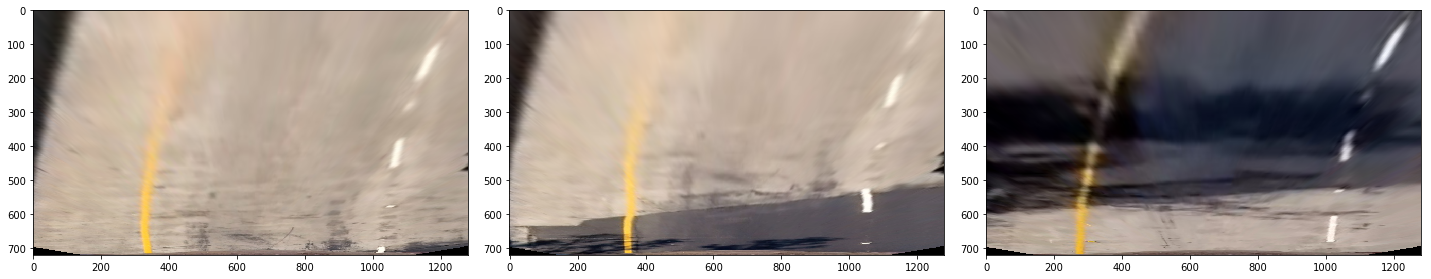

In [8]:

test_images = ['./test_images/test1.jpg',  './test_images/test4.jpg', './test_images/test5.jpg',]
undistorted_test = [cc.undistort_image(mpimg.imread(i)) for i in test_images]

warped_test_images = [cv2.warpPerspective(i, M, (dst_n_cols, dst_n_rows), 
                                          flags=cv2.INTER_LINEAR) for i in undistorted_test]


f, axes = plt.subplots(1, len(warped_test_images), figsize=(20,10))
f.tight_layout()
axes[0].imshow(warped_test_images[0])
axes[1].imshow(warped_test_images[1])
axes[2].imshow(warped_test_images[2])

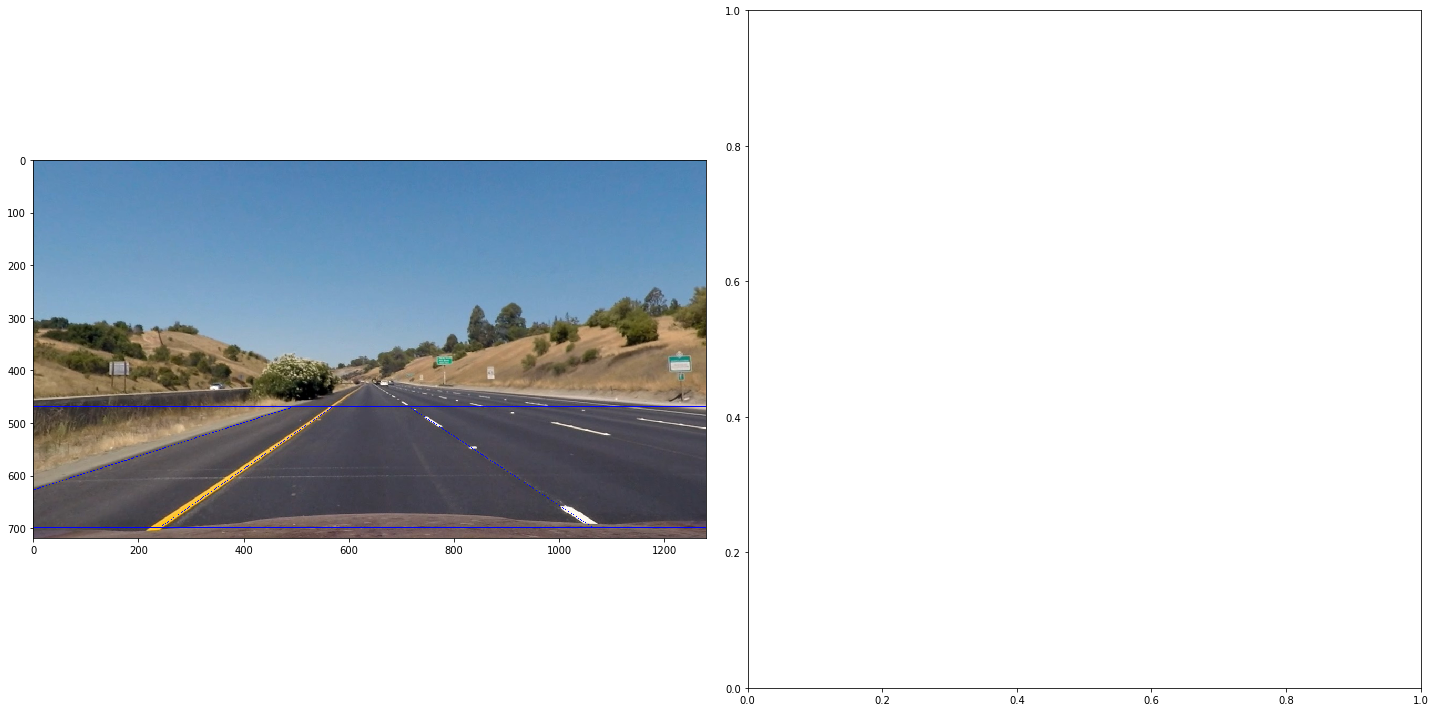

In [7]:
lines = []
y_top = 470
y_bottom = 700
lines.append(np.array([[0, y_top], [1280, y_top]]))

lines.append(np.array([[0, y_bottom], [1280, y_bottom]]))
lines.append(np.array([[240, y_bottom], [570, y_top]]))
lines.append(np.array([[1065, y_bottom], [715, y_top]]))
# lines.append(np.array([[0, 545], [1280, 545]]))

lines.append(np.array([[0, 628], [495, y_top]]))

imgs_copy = [np.copy(i) for i in straight_lines]

cv2.polylines(imgs_copy[0], lines, False, (0,0,255), thickness=1)

# cv2.polylines(imgs_copy[1], lines, False, (0,0,255), thickness=1)

# cv2.circle(imgs_copy[0], (835,545), 2, (255,0,0), 1)
cv2.circle(imgs_copy[0], (850,y_top), 2, (255,0,0), 1)
cv2.circle(imgs_copy[0], (1095,525), 2, (255,0,0), 1)

f, axes = plt.subplots(1, len(imgs_copy), figsize=(20,10))
f.tight_layout()
axes[0].imshow(imgs_copy[0])
# axes[1].imshow(imgs_copy[1])

In [8]:
def on_line(p1, p2, ycoord):
    return [p1[0]+ (p2[0]-p1[0])/float(p2[1]-p1[1])*(ycoord-p1[1]), ycoord]

bottom_left = on_line((495, 470), (0, 628), 700)
bottom_right = on_line((850, 470), (1095, 525), 700)
print(bottom_left)
print(bottom_right)

[-225.56962025316454, 700]
[1874.5454545454545, 700]


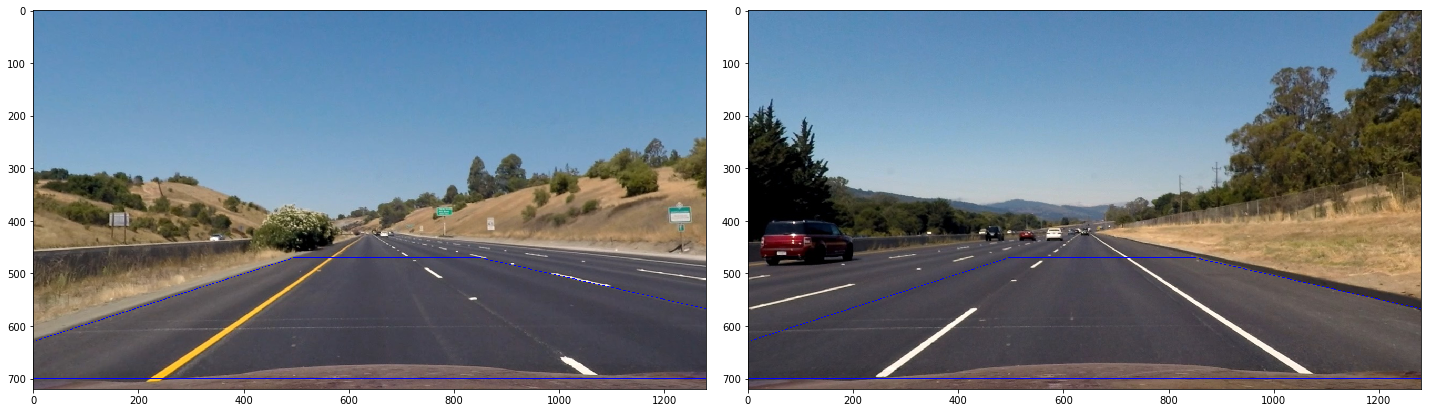

In [9]:
n_rows, n_cols = straight_lines[0].shape[0], straight_lines[0].shape[1]

source_points = np.array([bottom_left, # Bottom Left
                          bottom_right, # Bottom Right
                          [850, y_horizon], # Top right
                          [495, y_horizon] # Top Left
                         ], dtype=np.float32)


dst_n_rows, dst_n_cols = 300, 450
destination_points = np.array([[0, dst_n_rows], # Bottom Left
                               [ dst_n_cols, dst_n_rows], # Bottom Right
                               [ dst_n_cols, 0], # Top Right
                               [0 , 0] # Top Left
                              ], dtype=np.float32)

imgs_copy = [np.copy(i) for i in straight_lines]


f, axes = plt.subplots(1, len(imgs_copy), figsize=(20,10))
f.tight_layout()
for i in range(len(imgs_copy)):
#     axes[i].axis('off')
    cv2.polylines(imgs_copy[i], [source_points.astype(np.int32)], True, (0,0,255), thickness=1)
    axes[i].imshow(imgs_copy[i])

M = cv2.getPerspectiveTransform(source_points, destination_points)
MInv = cv2.getPerspectiveTransform(destination_points, source_points)

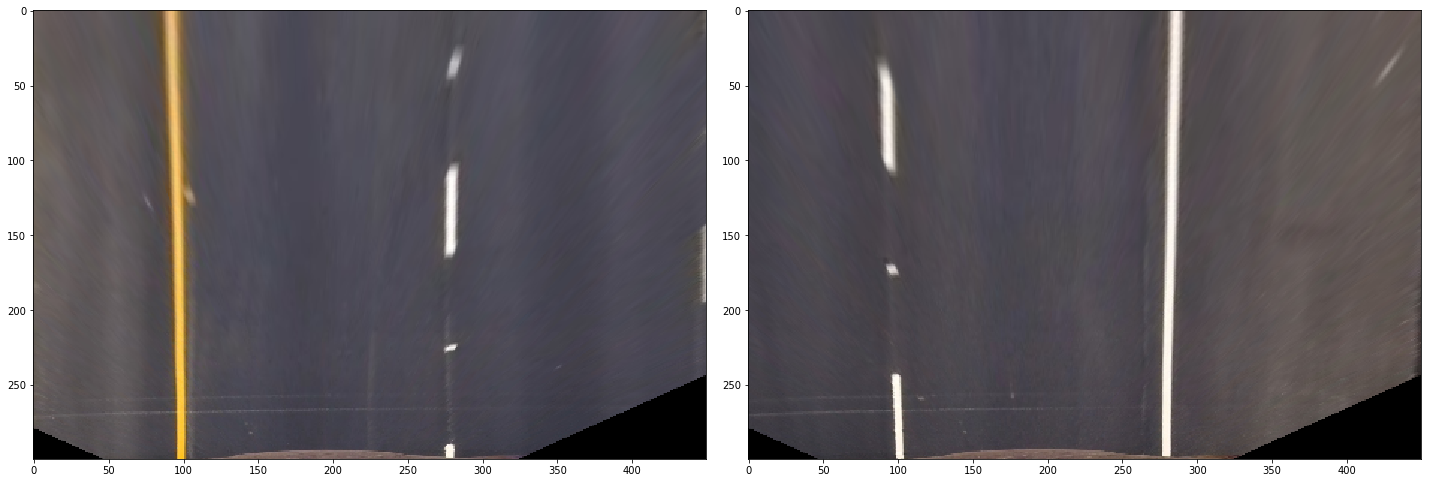

In [10]:
warped_1 = cv2.warpPerspective(straight_lines[0], M, (dst_n_cols, dst_n_rows), flags=cv2.INTER_LINEAR)
warped_2= cv2.warpPerspective(straight_lines[1], M, (dst_n_cols, dst_n_rows), flags=cv2.INTER_LINEAR)

f, axes = plt.subplots(1, len(imgs_copy), figsize=(20,10))
f.tight_layout()
axes[0].imshow(warped_1)
axes[1].imshow(warped_2)

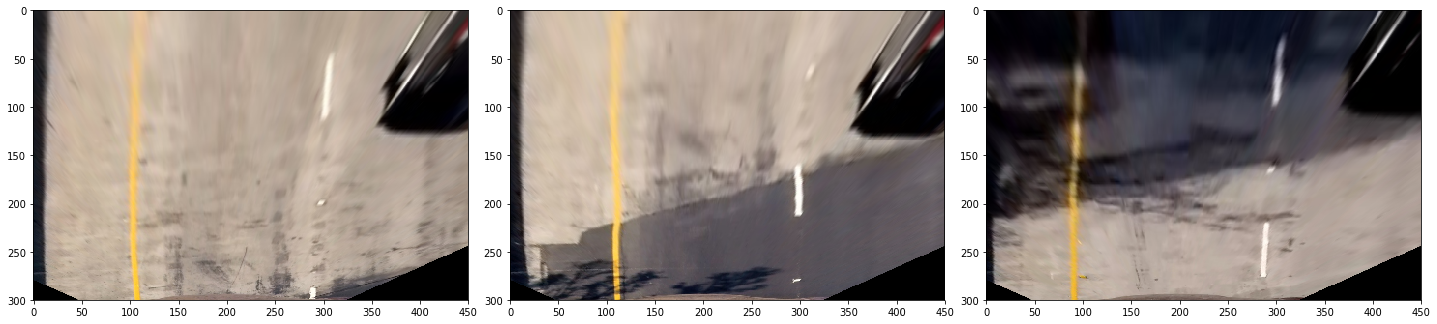

In [11]:

test_images = ['./test_images/test1.jpg',  './test_images/test4.jpg', './test_images/test5.jpg',]
undistorted_test = [cc.undistort_image(mpimg.imread(i)) for i in test_images]

warped_test_images = [cv2.warpPerspective(i, M, (dst_n_cols, dst_n_rows), 
                                          flags=cv2.INTER_LINEAR) for i in undistorted_test]


f, axes = plt.subplots(1, len(warped_test_images), figsize=(20,10))
f.tight_layout()
axes[0].imshow(warped_test_images[0])
axes[1].imshow(warped_test_images[1])
axes[2].imshow(warped_test_images[2])